# Preprocessing

## Importing Modules

In [10]:
pip install dtreeviz

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVR
import seaborn as sns
from sklearn.decomposition import PCA

## Importing Dataset

In [12]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0
4   27        No  ...                       2                     2

[5 rows x 35 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Missing Values

In [14]:
df.isna().any().any()

False

## Encoding String Values

In [15]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int64 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int64 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Separating Features from Output

In [17]:
Y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,replacement=True)
X_, Y1 = rus.fit_resample(X,Y)
X1 = pd.DataFrame(X_,columns=X.columns)

ros = RandomOverSampler(random_state=42)
X_, Y2 = ros.fit_resample(X,Y)
X2 = pd.DataFrame(X_,columns=X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# UnderSampling

In [19]:
X=X1
Y=Y1

## Train-Test-Split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

## PCA

[0.17909059 0.0695394  0.06396692 0.05335413 0.04915172 0.0452853
 0.04117785 0.03937477 0.03743157 0.03641183 0.03542509 0.03438029
 0.03245046 0.0309536  0.03056747 0.02867222 0.02735206 0.02545119
 0.02443546 0.02288096 0.01950418 0.01683996 0.01313965 0.00975458
 0.00930064 0.0069208  0.00630721 0.00576715 0.00385967 0.0012533 ]
Two PCs explain 100.0 % of variance cumulatively


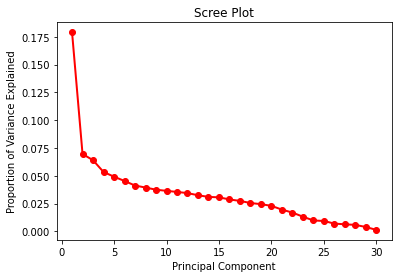

In [21]:
from sklearn.preprocessing import StandardScaler
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X_train))
print(pca.explained_variance_ratio_)
print('Two PCs explain', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[7.04698270e-01 2.92806063e-01 2.48652458e-03 5.74573016e-06
 1.06696324e-06 9.43403860e-07 5.42563394e-07 1.95181172e-07
 1.61962371e-07 8.73108877e-08 7.80558155e-08 6.34332686e-08
 5.29207379e-08 3.85086377e-08 2.79628612e-08 2.49819898e-08
 1.82834139e-08 1.76477355e-08 1.62930011e-08 1.53788275e-08
 1.23641971e-08 8.22058367e-09 7.07474768e-09 5.25281794e-09
 3.41052895e-09 3.16032329e-09 2.68813295e-09 1.87649822e-09
 1.11190316e-09 6.51312184e-10]
Two PCs explain  100.0 % of variance cumulatively


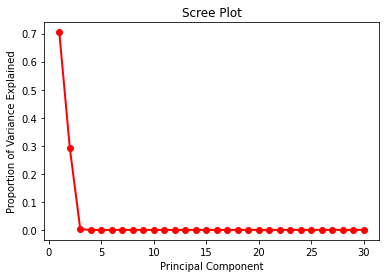

In [22]:
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[0.70469827 0.29280606]
Two PCs explain  99.75043330235238 % of variance cumulatively


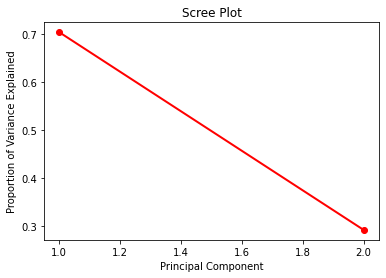

In [23]:
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [24]:
import plotly.express as px
fig = px.scatter(principalComponents, x=0, y=1, color=y_train)
fig.show()
X_train = principalComponents
X_test = pca.transform(X_test)

# Decision Tree

### Import Modules

In [25]:
import graphviz
from subprocess import check_call
from IPython.display import Image
from dtreeviz.trees import dtreeviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree, _tree
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, log_loss
import matplotlib.font_manager

## Decision Tree Classifier

Function to Visualize Decision Tree Model

In [26]:
def decision_tree_maker(X_train, Y_train, X_test, Y_test, my_depth = 5):

  # train model
  dt = DecisionTreeClassifier(random_state = 0, max_depth = my_depth, criterion='entropy')
  dt.fit(X_train, Y_train)

  # test model 
  Y_pred = dt.predict(X_test)
  # metric evaluation
  dt_accuracy = accuracy_score(Y_test, Y_pred)
  print('Acuuracy = ', dt_accuracy)
  dt_f1 = f1_score(Y_test, Y_pred)
  print('F1 Score = ', dt_f1)
  dt_precision = precision_score(Y_test, Y_pred)
  print('Precision = ', dt_precision)
  dt_recall = recall_score(Y_test, Y_pred)
  print('Recall = ', dt_recall)
  dt_confusion_matrix = confusion_matrix(Y_test, Y_pred)
  print('Confusion Matrix:\n', dt_confusion_matrix)

  # features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
  features = ['PC1', 'PC2']
  classes = ['No', 'Yes']

  # text representation of decision tree
  text_representation = export_text(dt, feature_names=features)
  print('------------ Text Representation of Decision Tree ----------')
  print(text_representation)

  np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
  # graphical represenation of decision tree, save to file 'decision_tree.png'
  dot_data = export_graphviz(dt, out_file ='tree.dot', feature_names=features, class_names=classes)
  check_call(['dot','-Tpng','tree.dot','-o','decision_tree.png'])

  # decision tree detailed visualisation
  viz = dtreeviz(dt, X_train, Y_train, target_name="Attrition Rate",feature_names=features, class_names=classes)
  return viz

### Train and Test Decision Tree Model

Acuuracy =  0.6526315789473685
F1 Score =  0.6024096385542169
Precision =  0.5952380952380952
Recall =  0.6097560975609756
Confusion Matrix:
 [[37 17]
 [16 25]]
------------ Text Representation of Decision Tree ----------
|--- PC2 <= -2777.42
|   |--- PC1 <= 10677.23
|   |   |--- PC1 <= 9667.12
|   |   |   |--- PC2 <= -3168.32
|   |   |   |   |--- class: 1
|   |   |   |--- PC2 >  -3168.32
|   |   |   |   |--- class: 1
|   |   |--- PC1 >  9667.12
|   |   |   |--- class: 0
|   |--- PC1 >  10677.23
|   |   |--- class: 1
|--- PC2 >  -2777.42
|   |--- PC2 <= 7398.39
|   |   |--- PC2 <= -2705.99
|   |   |   |--- PC1 <= -7886.90
|   |   |   |   |--- class: 1
|   |   |   |--- PC1 >  -7886.90
|   |   |   |   |--- class: 0
|   |   |--- PC2 >  -2705.99
|   |   |   |--- PC1 <= 7015.43
|   |   |   |   |--- class: 0
|   |   |   |--- PC1 >  7015.43
|   |   |   |   |--- class: 1
|   |--- PC2 >  7398.39
|   |   |--- PC1 <= -10618.46
|   |   |   |--- class: 1
|   |   |--- PC1 >  -10618.46
|   |   |   |-

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


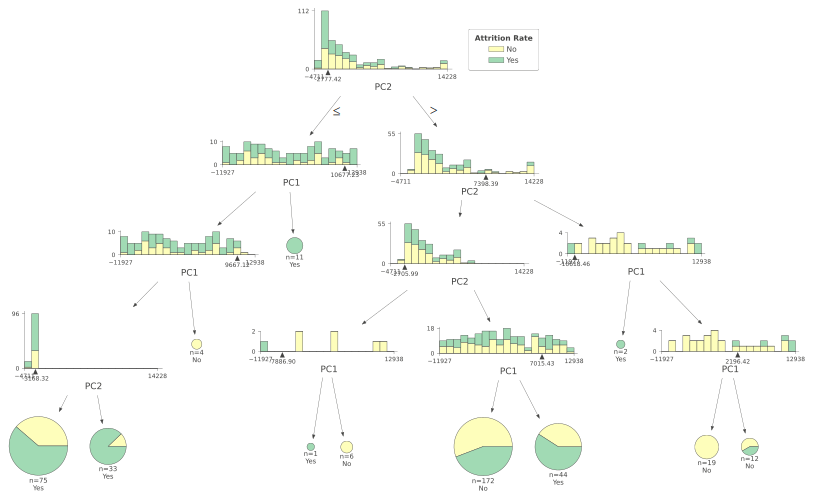

In [27]:
decision_tree_maker(X_train, y_train, X_test, y_test, 4)

Visualize Decision Tree Model

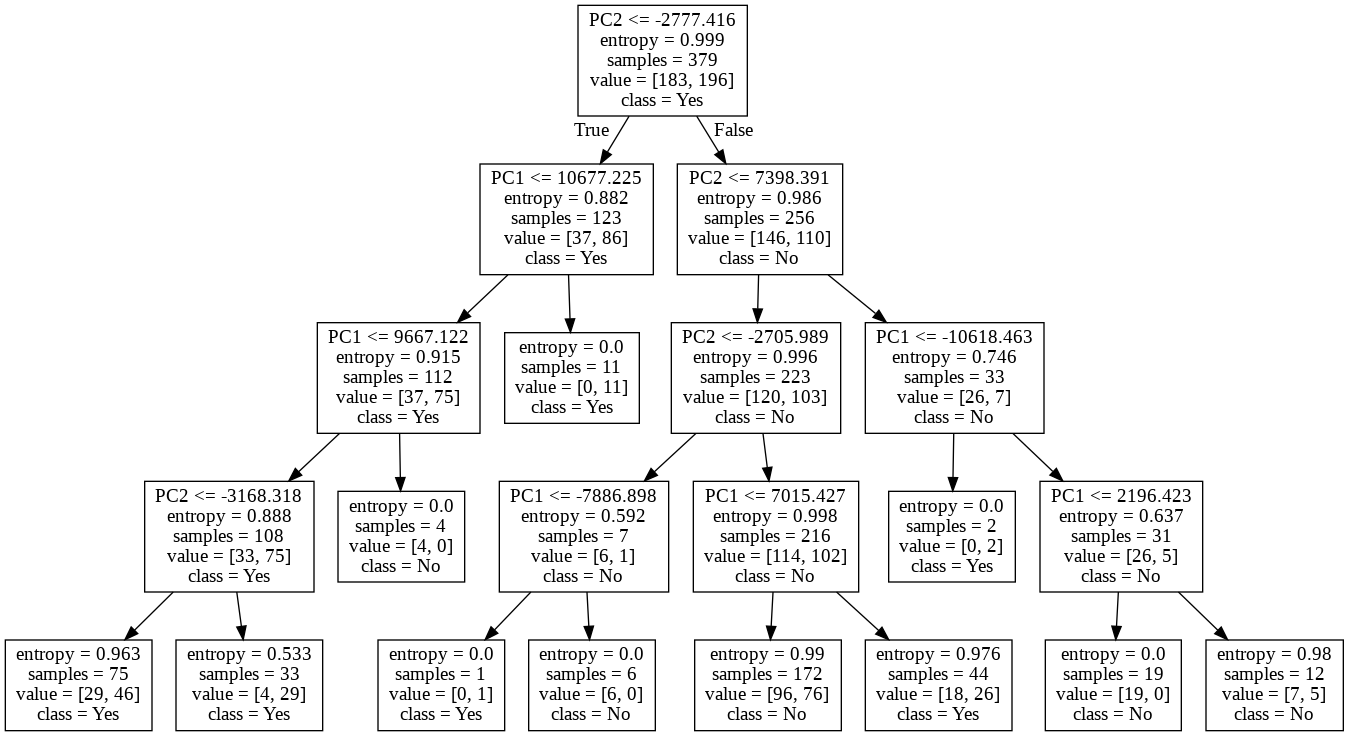

In [28]:
 # graphical represenation of decision tree, view file 'decision_tree.png'
 Image('decision_tree.png')

## Hyperparameter Tuning using GridSearch CV 

Analyzing Accuracy with Depth of Decision Tree

[]

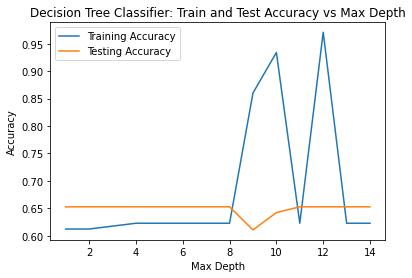

In [29]:
dt_train_accuracy = []
dt_test_accuracy = []

# do GridSearch CV over different values
for i in np.arange(1, 15):
  param_grid = {'criterion':['entropy','gini'],'max_depth': [i],'max_leaf_nodes':[5, 10, 20, 50, 100],'random_state':[0]}
  dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
  dt.fit(X_train,y_train)
  y_train_pred = dt.predict(X_train)
  y_pred = dt.predict(X_test)
  s = accuracy_score(y_train, y_train_pred)
  dt_train_accuracy.append(s)
  dt_test_accuracy.append(accuracy_score(y_test, y_pred))

# plot graph
plt.title("Decision Tree Classifier: Train and Test Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,15), dt_train_accuracy, label="Training Accuracy")
plt.plot(np.arange(1,15), dt_test_accuracy, label="Testing Accuracy")
plt.legend()
plt.plot()

In [30]:
# print values at max depth = 4
print('Train Accuracy at max depth = 4 : ', dt_train_accuracy[3])
print('Test Accuracy at max depth = 4 : ', dt_test_accuracy[3])

Train Accuracy at max depth = 4 :  0.6226912928759895
Test Accuracy at max depth = 4 :  0.6526315789473685


Function for Grid Search CV

In [31]:
# performing GridSearchCV on data to get best model hyperparameters
def gcv(X_train, Y_train, X_test, Y_test):

  # make scorer
  scoring = make_scorer(accuracy_score)

  # define parameters
  max_depth = [int(x) for x in np.linspace(2, 15, num=10)] 
  # max_depth.append(None)

  # perform GridSearchCV with given parameters
  g_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                param_grid={'criterion': ['gini', 'entropy'],
                            'max_depth': max_depth,
                            'max_features': ['auto', 'log2', 'sqrt', 0.33334],
                            'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                            'min_samples_split': range(2, 10),
                            'max_leaf_nodes': [5, 10, 20, 50, 100],
                            'random_state': [0]},
                scoring=scoring, cv=5, refit=True)

  g_cv.fit(X_train, Y_train)

  # get best parameter values
  print(g_cv.best_params_)

  # train new model with best parameters
  dt_classifier = DecisionTreeClassifier(**g_cv.best_params_).fit(X_train, Y_train)
  Y_pred = dt_classifier.predict(X_test)
  dt_accuracy = accuracy_score(Y_test, Y_pred)
  print('Accuracy = ', dt_accuracy)
  dt_f1 = f1_score(Y_test, Y_pred)
  print('F1 Score = ', dt_f1)
  dt_precision = precision_score(Y_test, Y_pred)
  print('Precision = ', dt_precision)
  dt_recall = recall_score(Y_test, Y_pred)
  print('Recall = ', dt_recall)
  return dt_classifier, g_cv.best_params_, dt_accuracy

Run Grid Search CV

In [32]:
dt_classifier, best_params_raw, accuracy_cv = gcv(X_train, y_train, X_test, y_test)

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'max_leaf_nodes': 50, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}
Accuracy =  0.5894736842105263
F1 Score =  0.5063291139240507
Precision =  0.5263157894736842
Recall =  0.4878048780487805


### Visualizing Decision Tree Model 

Decision Tree Model with Best Parameters

Accuracy =  0.5894736842105263
F1 Score =  0.5063291139240507
Precision =  0.5263157894736842
Recall =  0.4878048780487805


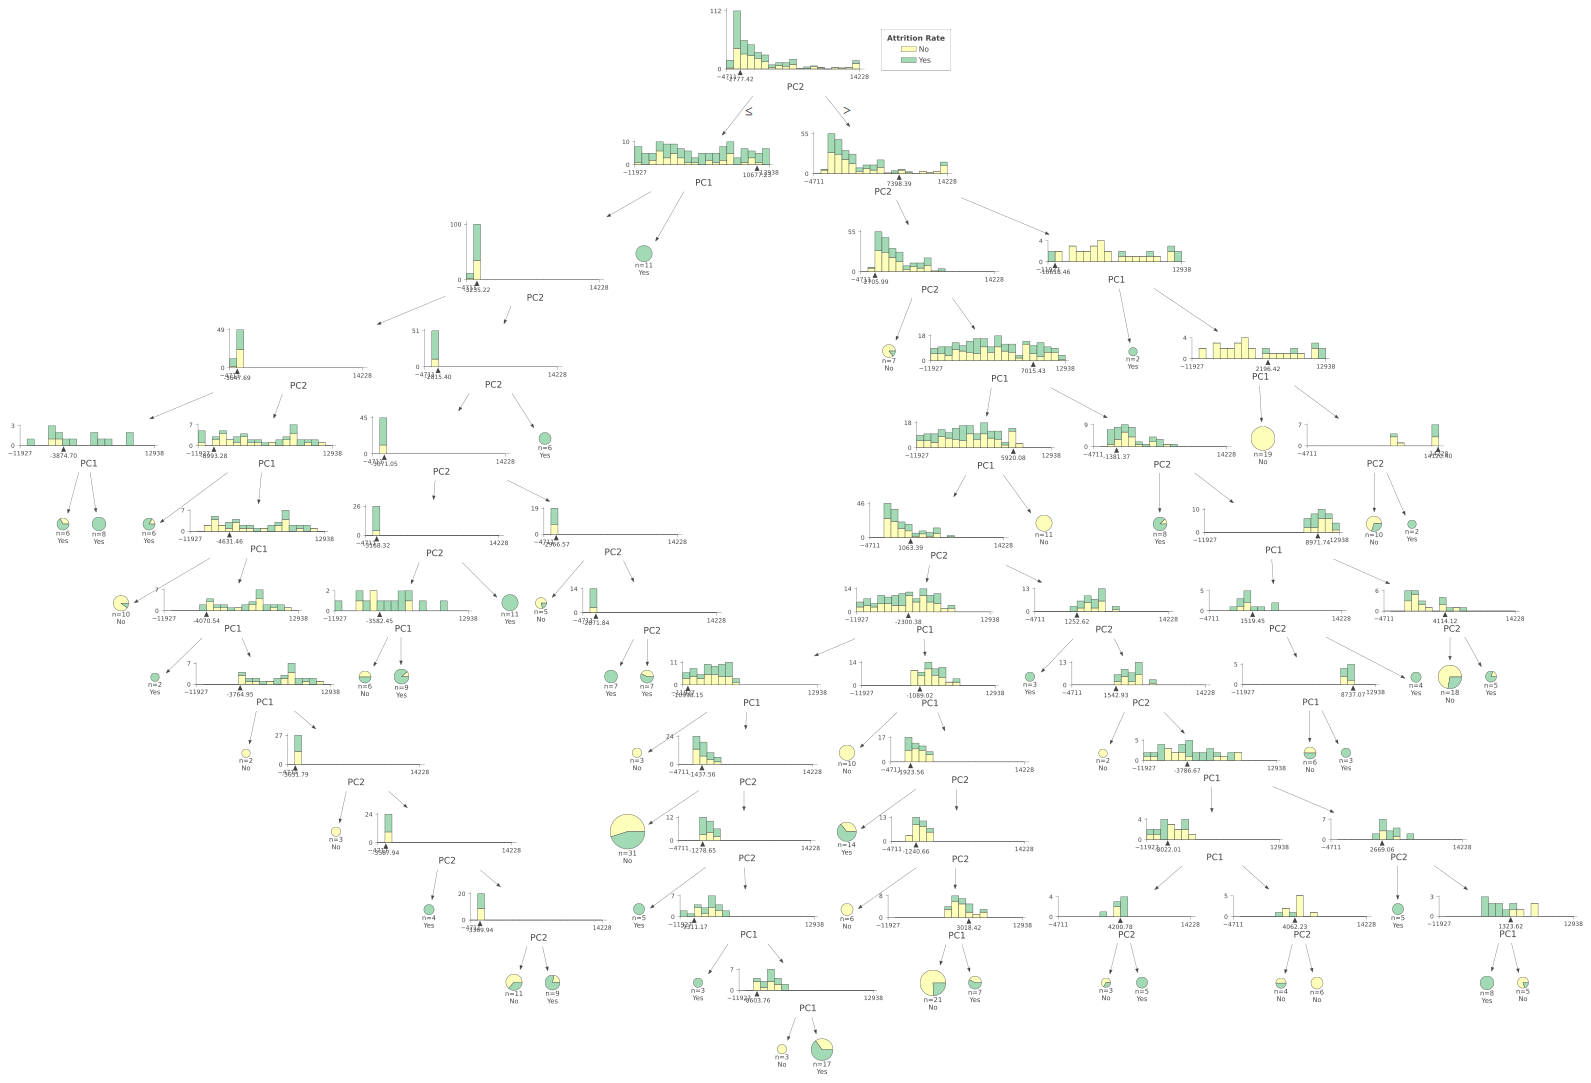

In [33]:
# train new model with best parameters
dt_classifier = DecisionTreeClassifier(**best_params_raw).fit(X_train, y_train)
Y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy = ', dt_accuracy)
dt_f1 = f1_score(y_test, Y_pred)
print('F1 Score = ', dt_f1)
dt_precision = precision_score(y_test, Y_pred)
print('Precision = ', dt_precision)
dt_recall = recall_score(y_test, Y_pred)
print('Recall = ', dt_recall)
# features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
features = ['PC1', 'PC2']
classes = ['No', 'Yes']
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
# graphical represenation of decision tree, save to file 'decision_tree.png'
dot_data = export_graphviz(dt_classifier, out_file ='tree_best.dot', feature_names=features, class_names=classes)
check_call(['dot','-Tpng','tree_best.dot','-o','decision_tree_best.png'])
dtreeviz(dt_classifier, X_train, y_train, target_name="Attrition Rate",feature_names=features, class_names=classes)

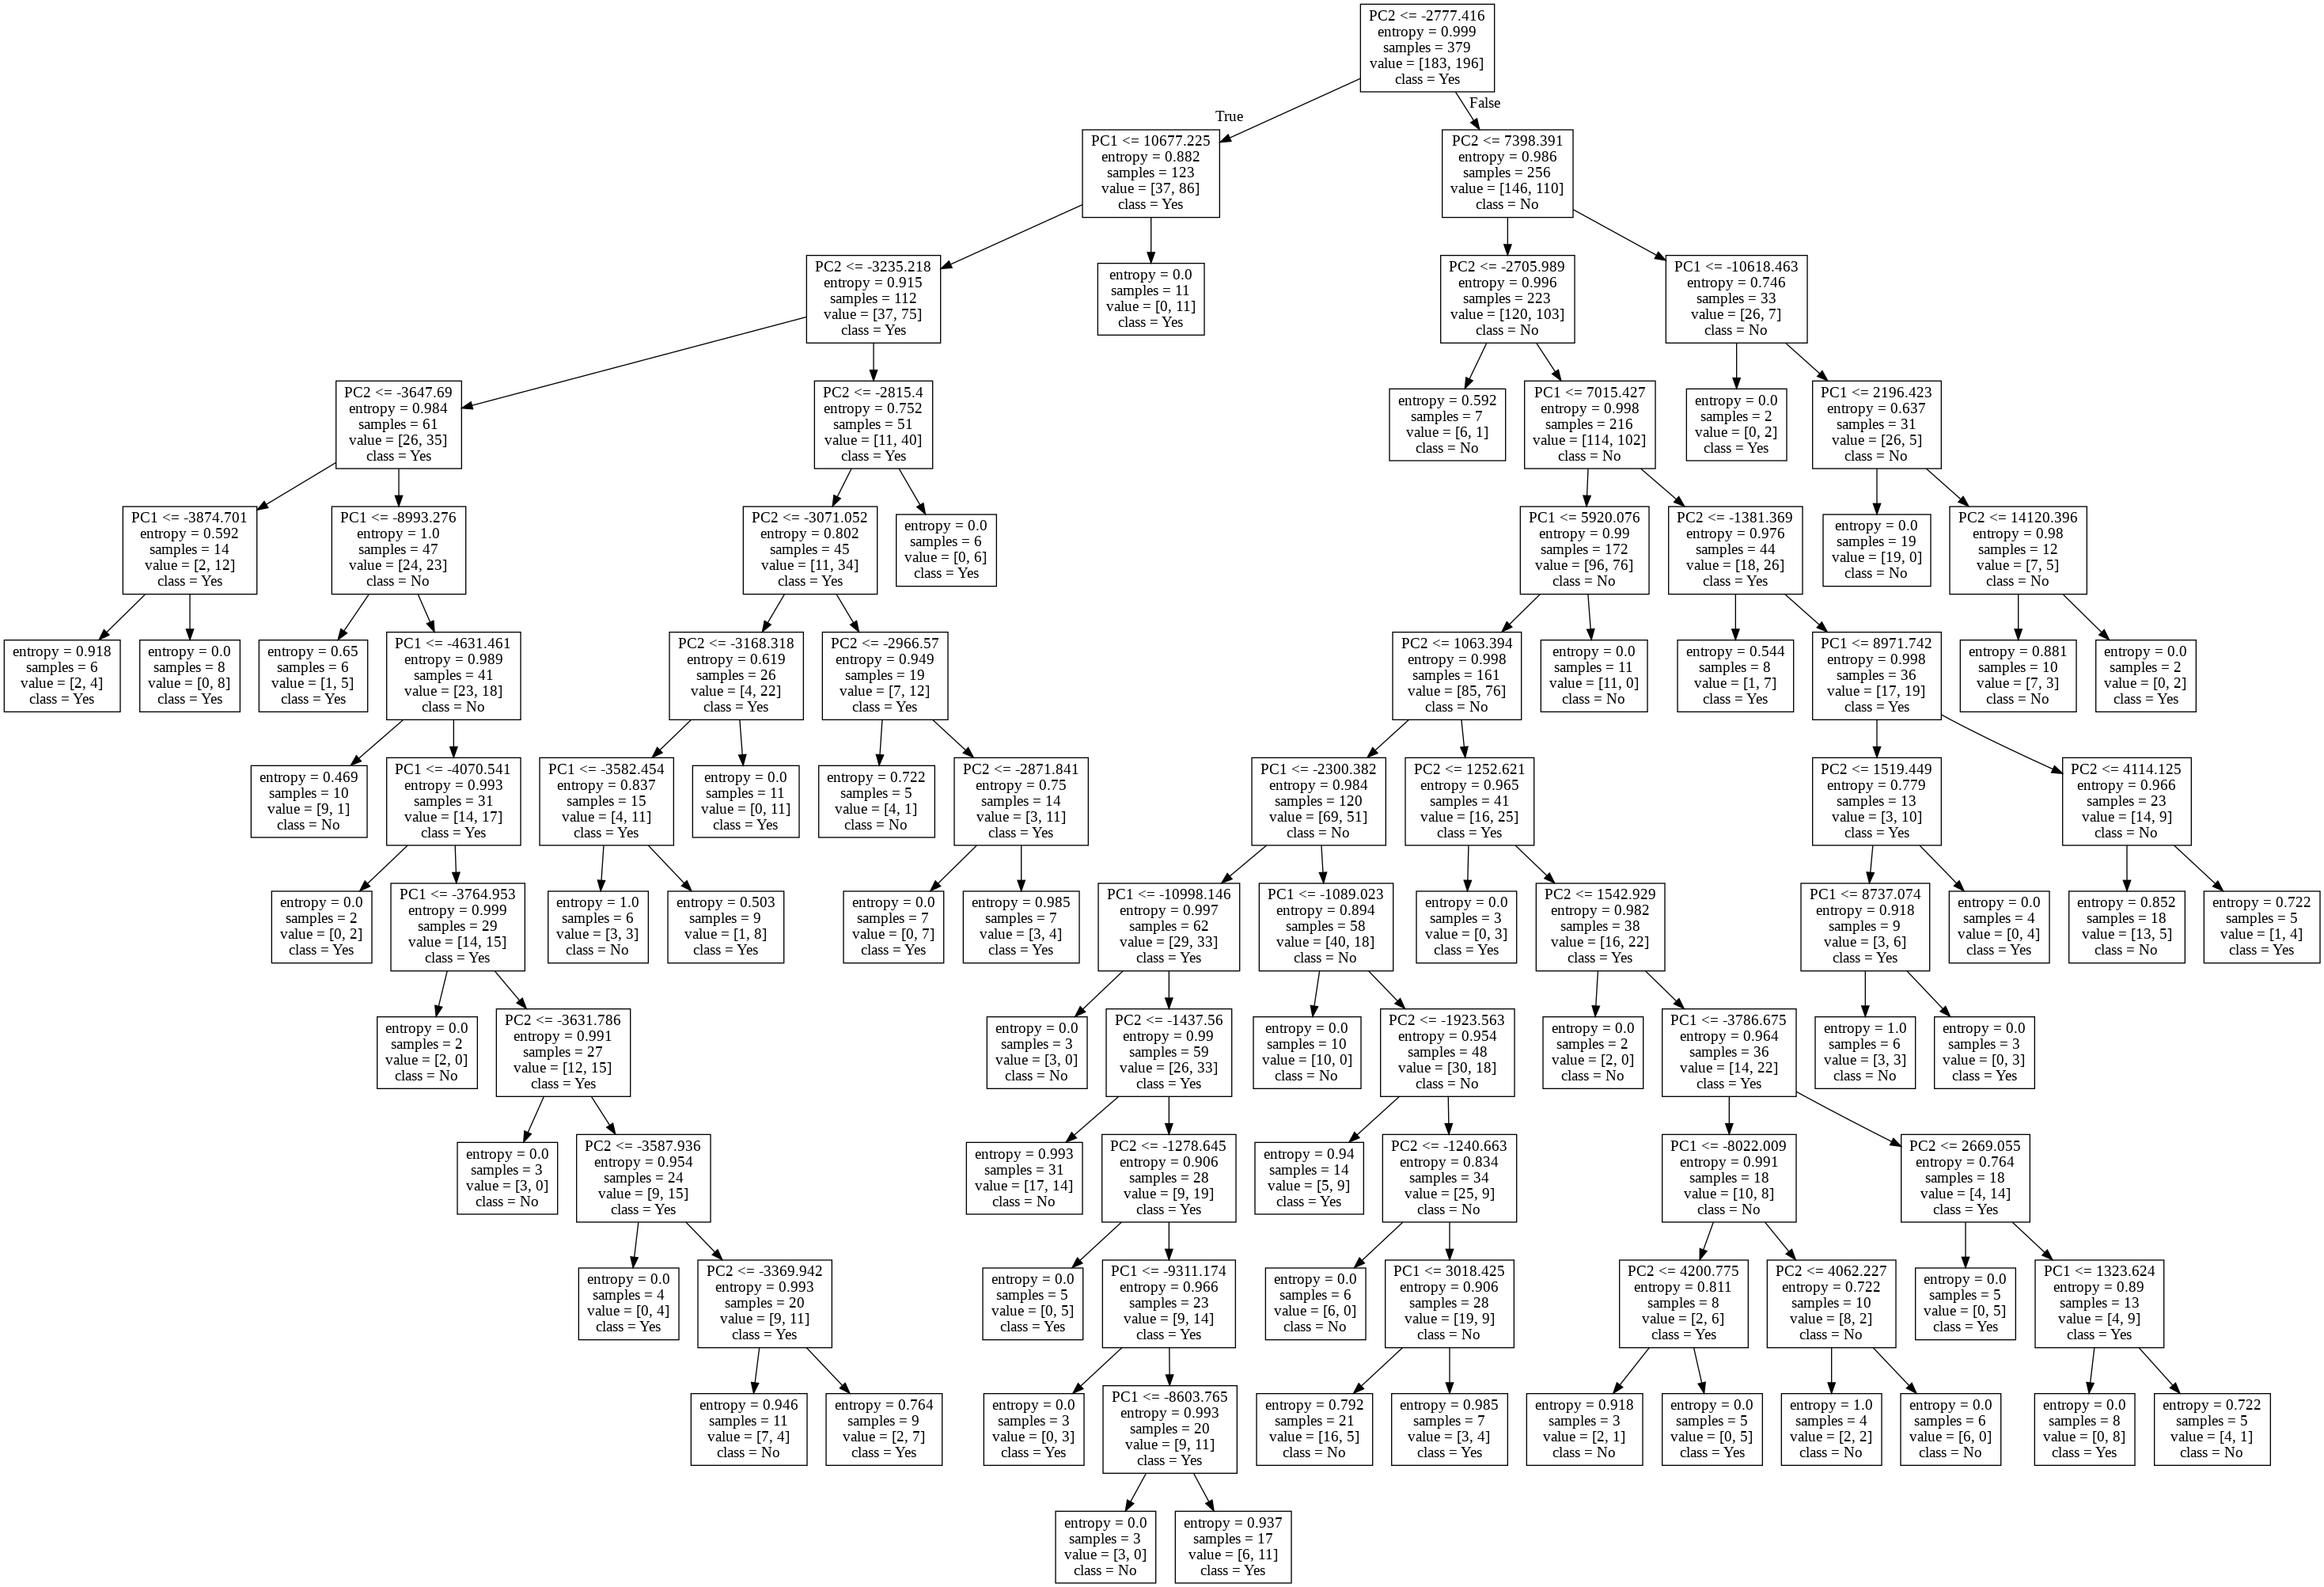

In [34]:
Image('decision_tree_best.png')

## K Fold Cross Validation

In [35]:
def cross_validation(model, X, y, my_cv = 5):
  scores = cross_validate(model, X, y, cv=my_cv, scoring=('accuracy','precision','recall','f1'))
  print(scores)
  print("Accuracy: ", np.mean(scores['test_accuracy']))
  print("Precision: ", np.mean(scores['test_precision']))
  print("Recall: ", np.mean(scores['test_recall']))
  print("F1 Score: ", np.mean(scores['test_f1']))

### Performing K Fold Cross Validation with above Hyperparameters

In [36]:
cross_validation(DecisionTreeClassifier(**best_params_raw), X, Y, 5)

{'fit_time': array([0.00513005, 0.00389051, 0.00398111, 0.00450206, 0.00413442]), 'score_time': array([0.00524259, 0.00496721, 0.00506186, 0.00500631, 0.00531507]), 'test_accuracy': array([0.66315789, 0.66315789, 0.73684211, 0.6       , 0.65957447]), 'test_precision': array([0.69230769, 0.69230769, 0.73469388, 0.61363636, 0.63157895]), 'test_recall': array([0.57446809, 0.57446809, 0.75      , 0.5625    , 0.76595745]), 'test_f1': array([0.62790698, 0.62790698, 0.74226804, 0.58695652, 0.69230769])}
Accuracy:  0.6645464725643897
Precision:  0.672904914634238
Recall:  0.6454787234042554
F1 Score:  0.6554692417544616


# Oversampling


In [37]:
X=X2
Y=Y2

## Train-Test-Split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

## PCA

[0.1702735  0.0687757  0.06154056 0.05301291 0.04874286 0.0428283
 0.03943926 0.03862673 0.03753099 0.03639407 0.03492537 0.03409461
 0.03299361 0.03166091 0.030604   0.02979108 0.02916318 0.02690642
 0.0264286  0.02561014 0.02365863 0.01613906 0.01502826 0.01017928
 0.00879725 0.00788217 0.00693934 0.0065349  0.00405076 0.00144756]
Two PCs explain 100.0 % of variance cumulatively


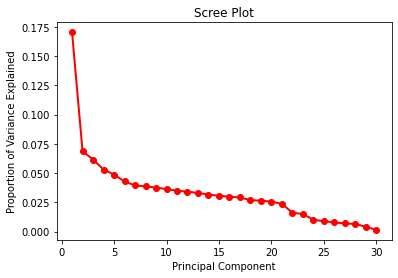

In [39]:
from sklearn.preprocessing import StandardScaler
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(StandardScaler().fit_transform(X_train))
print(pca.explained_variance_ratio_)
print('Two PCs explain', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[7.27536185e-01 2.70208299e-01 2.24645749e-03 5.59218997e-06
 1.08582444e-06 9.64562988e-07 5.72229242e-07 1.93700959e-07
 1.54999364e-07 9.15143659e-08 7.58256548e-08 6.89418416e-08
 5.64004578e-08 4.24266255e-08 2.71464769e-08 2.11905775e-08
 1.81334581e-08 1.70728684e-08 1.55161305e-08 1.46463550e-08
 1.30828060e-08 7.63534600e-09 7.17506632e-09 5.66962766e-09
 3.38261139e-09 3.06938364e-09 2.68817186e-09 2.02915610e-09
 1.17254277e-09 6.90222080e-10]
Two PCs explain  100.00000000000003 % of variance cumulatively


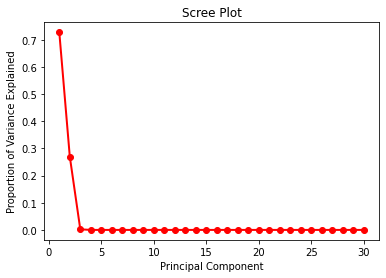

In [40]:
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

[0.72753618 0.2702083 ]
Two PCs explain  99.77444835909776 % of variance cumulatively


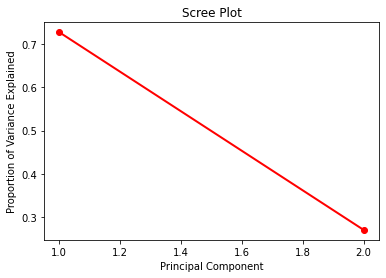

In [41]:
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
print('Two PCs explain ', sum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [42]:
import plotly.express as px
fig = px.scatter(principalComponents, x=0, y=1, color=y_train)
fig.show()
X_train = principalComponents
X_test = pca.transform(X_test)

# Decision Tree

### Import Modules

In [43]:
import graphviz
from subprocess import check_call
from IPython.display import Image
from dtreeviz.trees import dtreeviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree, _tree
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, log_loss
import matplotlib.font_manager

## Decision Tree Classifier

Function to Visualize Decision Tree Model

In [44]:
def decision_tree_maker(X_train, Y_train, X_test, Y_test, my_depth = 5):

  # train model
  dt = DecisionTreeClassifier(random_state = 0, max_depth = my_depth, criterion='entropy')
  dt.fit(X_train, Y_train)

  # test model 
  Y_pred = dt.predict(X_test)
  # metric evaluation
  dt_accuracy = accuracy_score(Y_test, Y_pred)
  print('Acuuracy = ', dt_accuracy)
  dt_f1 = f1_score(Y_test, Y_pred)
  print('F1 Score = ', dt_f1)
  dt_precision = precision_score(Y_test, Y_pred)
  print('Precision = ', dt_precision)
  dt_recall = recall_score(Y_test, Y_pred)
  print('Recall = ', dt_recall)
  dt_confusion_matrix = confusion_matrix(Y_test, Y_pred)
  print('Confusion Matrix:\n', dt_confusion_matrix)

  # features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
  features = ['PC1', 'PC2']
  classes = ['No', 'Yes']

  # text representation of decision tree
  text_representation = export_text(dt, feature_names=features)
  print('------------ Text Representation of Decision Tree ----------')
  print(text_representation)

  np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
  # graphical represenation of decision tree, save to file 'decision_tree.png'
  dot_data = export_graphviz(dt, out_file ='tree.dot', feature_names=features, class_names=classes)
  check_call(['dot','-Tpng','tree.dot','-o','decision_tree.png'])

  # decision tree detailed visualisation
  viz = dtreeviz(dt, X_train, Y_train, target_name="Attrition Rate",feature_names=features, class_names=classes)
  return viz

### Train and Test Decision Tree Model

Acuuracy =  0.6578947368421053
F1 Score =  0.6060606060606062
Precision =  0.7027027027027027
Recall =  0.5327868852459017
Confusion Matrix:
 [[195  55]
 [114 130]]
------------ Text Representation of Decision Tree ----------
|--- PC2 <= -2562.43
|   |--- PC1 <= -10601.39
|   |   |--- PC1 <= -12265.85
|   |   |   |--- class: 0
|   |   |--- PC1 >  -12265.85
|   |   |   |--- PC2 <= -2701.93
|   |   |   |   |--- class: 1
|   |   |   |--- PC2 >  -2701.93
|   |   |   |   |--- class: 0
|   |--- PC1 >  -10601.39
|   |   |--- PC2 <= -4383.47
|   |   |   |--- PC1 <= 11932.29
|   |   |   |   |--- class: 1
|   |   |   |--- PC1 >  11932.29
|   |   |   |   |--- class: 1
|   |   |--- PC2 >  -4383.47
|   |   |   |--- PC1 <= 11720.35
|   |   |   |   |--- class: 1
|   |   |   |--- PC1 >  11720.35
|   |   |   |   |--- class: 0
|--- PC2 >  -2562.43
|   |--- PC2 <= 7264.77
|   |   |--- PC2 <= 7182.85
|   |   |   |--- PC1 <= -11704.44
|   |   |   |   |--- class: 0
|   |   |   |--- PC1 >  -11704.44
|   |   

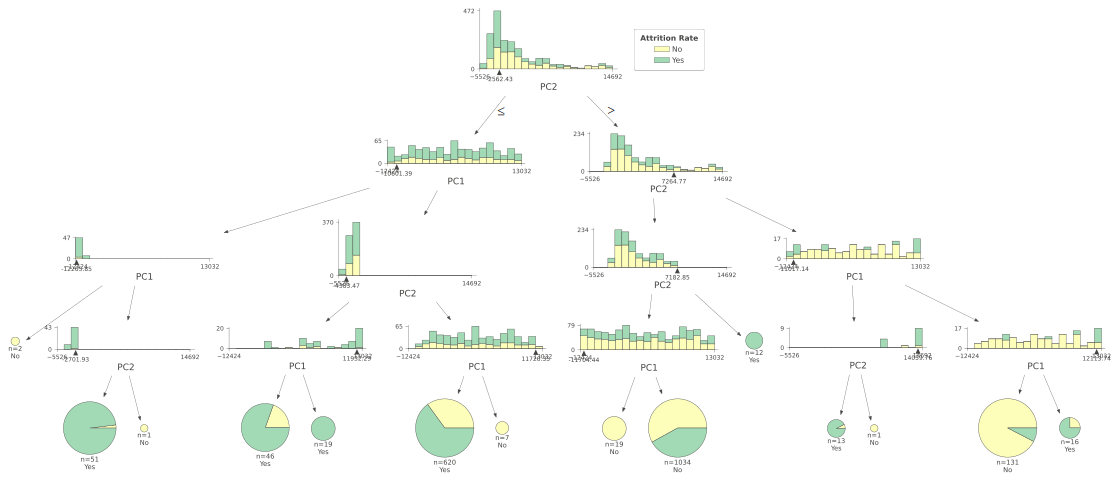

In [45]:
decision_tree_maker(X_train, y_train, X_test, y_test, 4)

Visualize Decision Tree Model

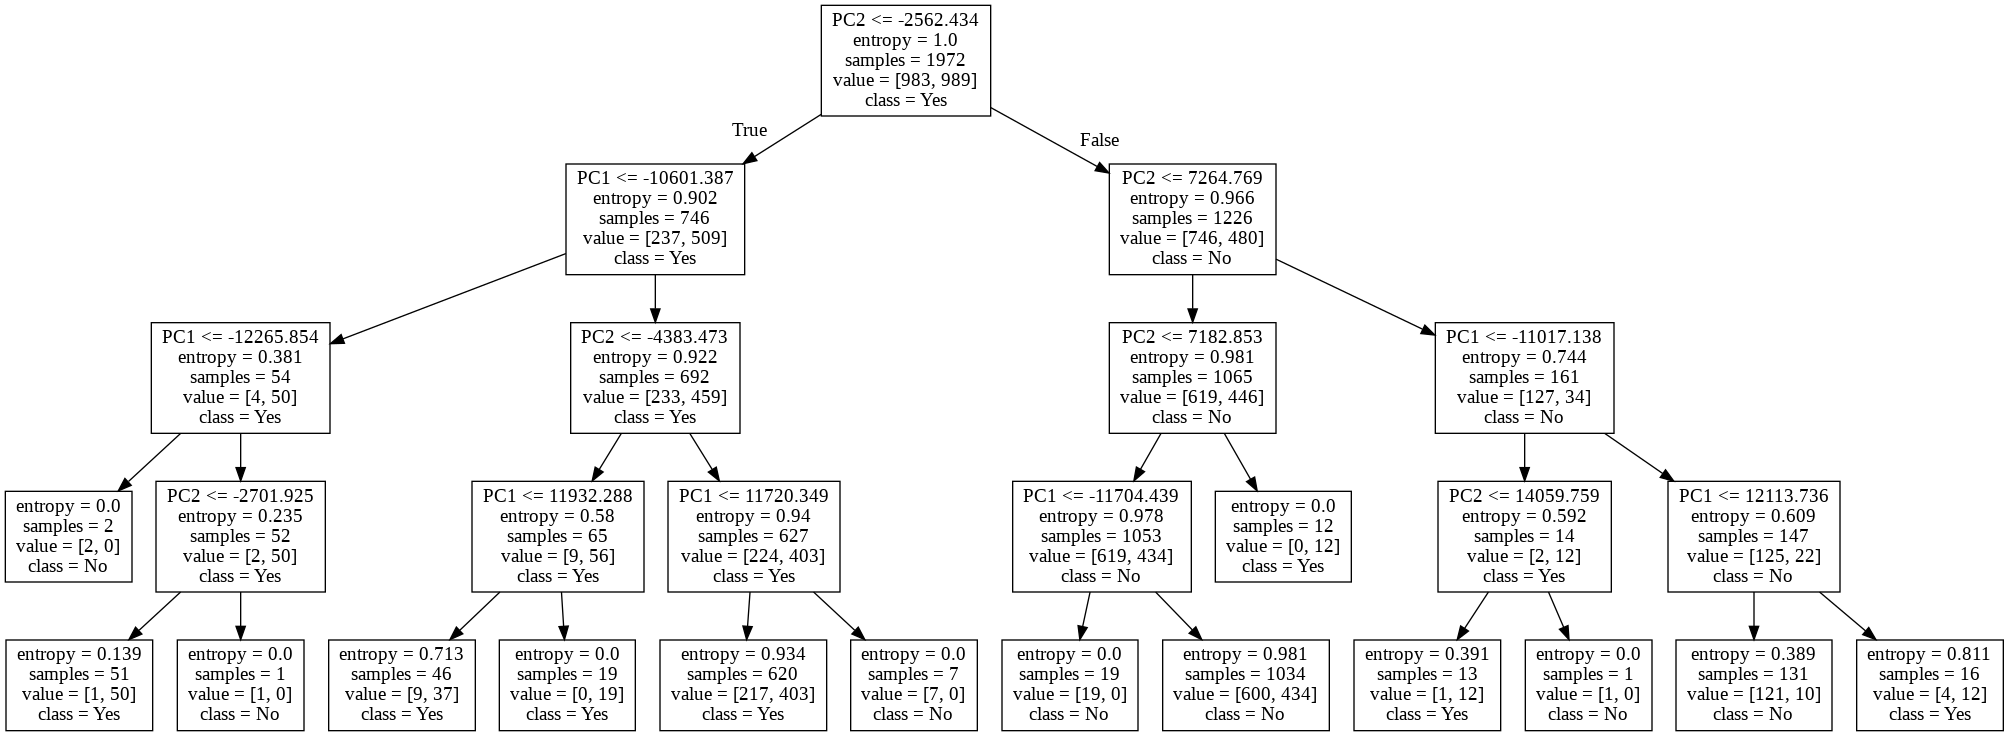

In [46]:
 # graphical represenation of decision tree, view file 'decision_tree.png'
 Image('decision_tree.png')

## Hyperparameter Tuning using GridSearch CV 

Analyzing Accuracy with Depth of Decision Tree

[]

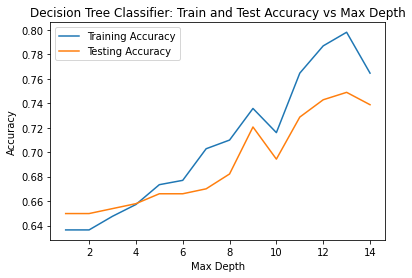

In [47]:
dt_train_accuracy = []
dt_test_accuracy = []

# do GridSearch CV over different values
for i in np.arange(1, 15):
  param_grid = {'criterion':['entropy','gini'],'max_depth': [i],'max_leaf_nodes':[5, 10, 20, 50, 100],'random_state':[0]}
  dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
  dt.fit(X_train,y_train)
  y_train_pred = dt.predict(X_train)
  y_pred = dt.predict(X_test)
  s = accuracy_score(y_train, y_train_pred)
  dt_train_accuracy.append(s)
  dt_test_accuracy.append(accuracy_score(y_test, y_pred))

# plot graph
plt.title("Decision Tree Classifier: Train and Test Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,15), dt_train_accuracy, label="Training Accuracy")
plt.plot(np.arange(1,15), dt_test_accuracy, label="Testing Accuracy")
plt.legend()
plt.plot()

In [48]:
# print values at max depth = 4
print('Train Accuracy at max depth = 4 : ', dt_train_accuracy[3])
print('Test Accuracy at max depth = 4 : ', dt_test_accuracy[3])

Train Accuracy at max depth = 4 :  0.6572008113590264
Test Accuracy at max depth = 4 :  0.6578947368421053


Function for Grid Search CV

In [49]:
# performing GridSearchCV on data to get best model hyperparameters
def gcv(X_train, Y_train, X_test, Y_test):

  # make scorer
  scoring = make_scorer(accuracy_score)

  # define parameters
  max_depth = [int(x) for x in np.linspace(2, 15, num=10)] 
  # max_depth.append(None)

  # perform GridSearchCV with given parameters
  g_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                param_grid={'criterion': ['gini', 'entropy'],
                            'max_depth': max_depth,
                            'max_features': ['auto', 'log2', 'sqrt', 0.33334],
                            'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                            'min_samples_split': range(2, 10),
                            'max_leaf_nodes': [5, 10, 20, 50, 100],
                            'random_state': [0]},
                scoring=scoring, cv=5, refit=True)

  g_cv.fit(X_train, Y_train)

  # get best parameter values
  print(g_cv.best_params_)

  # train new model with best parameters
  dt_classifier = DecisionTreeClassifier(**g_cv.best_params_).fit(X_train, Y_train)
  Y_pred = dt_classifier.predict(X_test)
  dt_accuracy = accuracy_score(Y_test, Y_pred)
  print('Accuracy = ', dt_accuracy)
  dt_f1 = f1_score(Y_test, Y_pred)
  print('F1 Score = ', dt_f1)
  dt_precision = precision_score(Y_test, Y_pred)
  print('Precision = ', dt_precision)
  dt_recall = recall_score(Y_test, Y_pred)
  print('Recall = ', dt_recall)
  return dt_classifier, g_cv.best_params_, dt_accuracy

Run Grid Search CV

In [50]:
dt_classifier, best_params_raw, accuracy_cv = gcv(X_train, y_train, X_test, y_test)

{'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
Accuracy =  0.7489878542510121
F1 Score =  0.7642585551330798
Precision =  0.7127659574468085
Recall =  0.8237704918032787


### Visualizing Decision Tree Model 

Decision Tree Model with Best Parameters

In [51]:
# train new model with best parameters
dt_classifier = DecisionTreeClassifier(**best_params_raw).fit(X_train, y_train)
Y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy = ', dt_accuracy)
dt_f1 = f1_score(y_test, Y_pred)
print('F1 Score = ', dt_f1)
dt_precision = precision_score(y_test, Y_pred)
print('Precision = ', dt_precision)
dt_recall = recall_score(y_test, Y_pred)
print('Recall = ', dt_recall)
# features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
features = ['PC1', 'PC2']
classes = ['No', 'Yes']
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
# graphical represenation of decision tree, save to file 'decision_tree.png'
dot_data = export_graphviz(dt_classifier, out_file ='tree_best.dot', feature_names=features, class_names=classes)
check_call(['dot','-Tpng','tree_best.dot','-o','decision_tree_best.png'])
dtreeviz(dt_classifier, X_train, y_train, target_name="Attrition Rate",feature_names=features, class_names=classes)

Output hidden; open in https://colab.research.google.com to view.

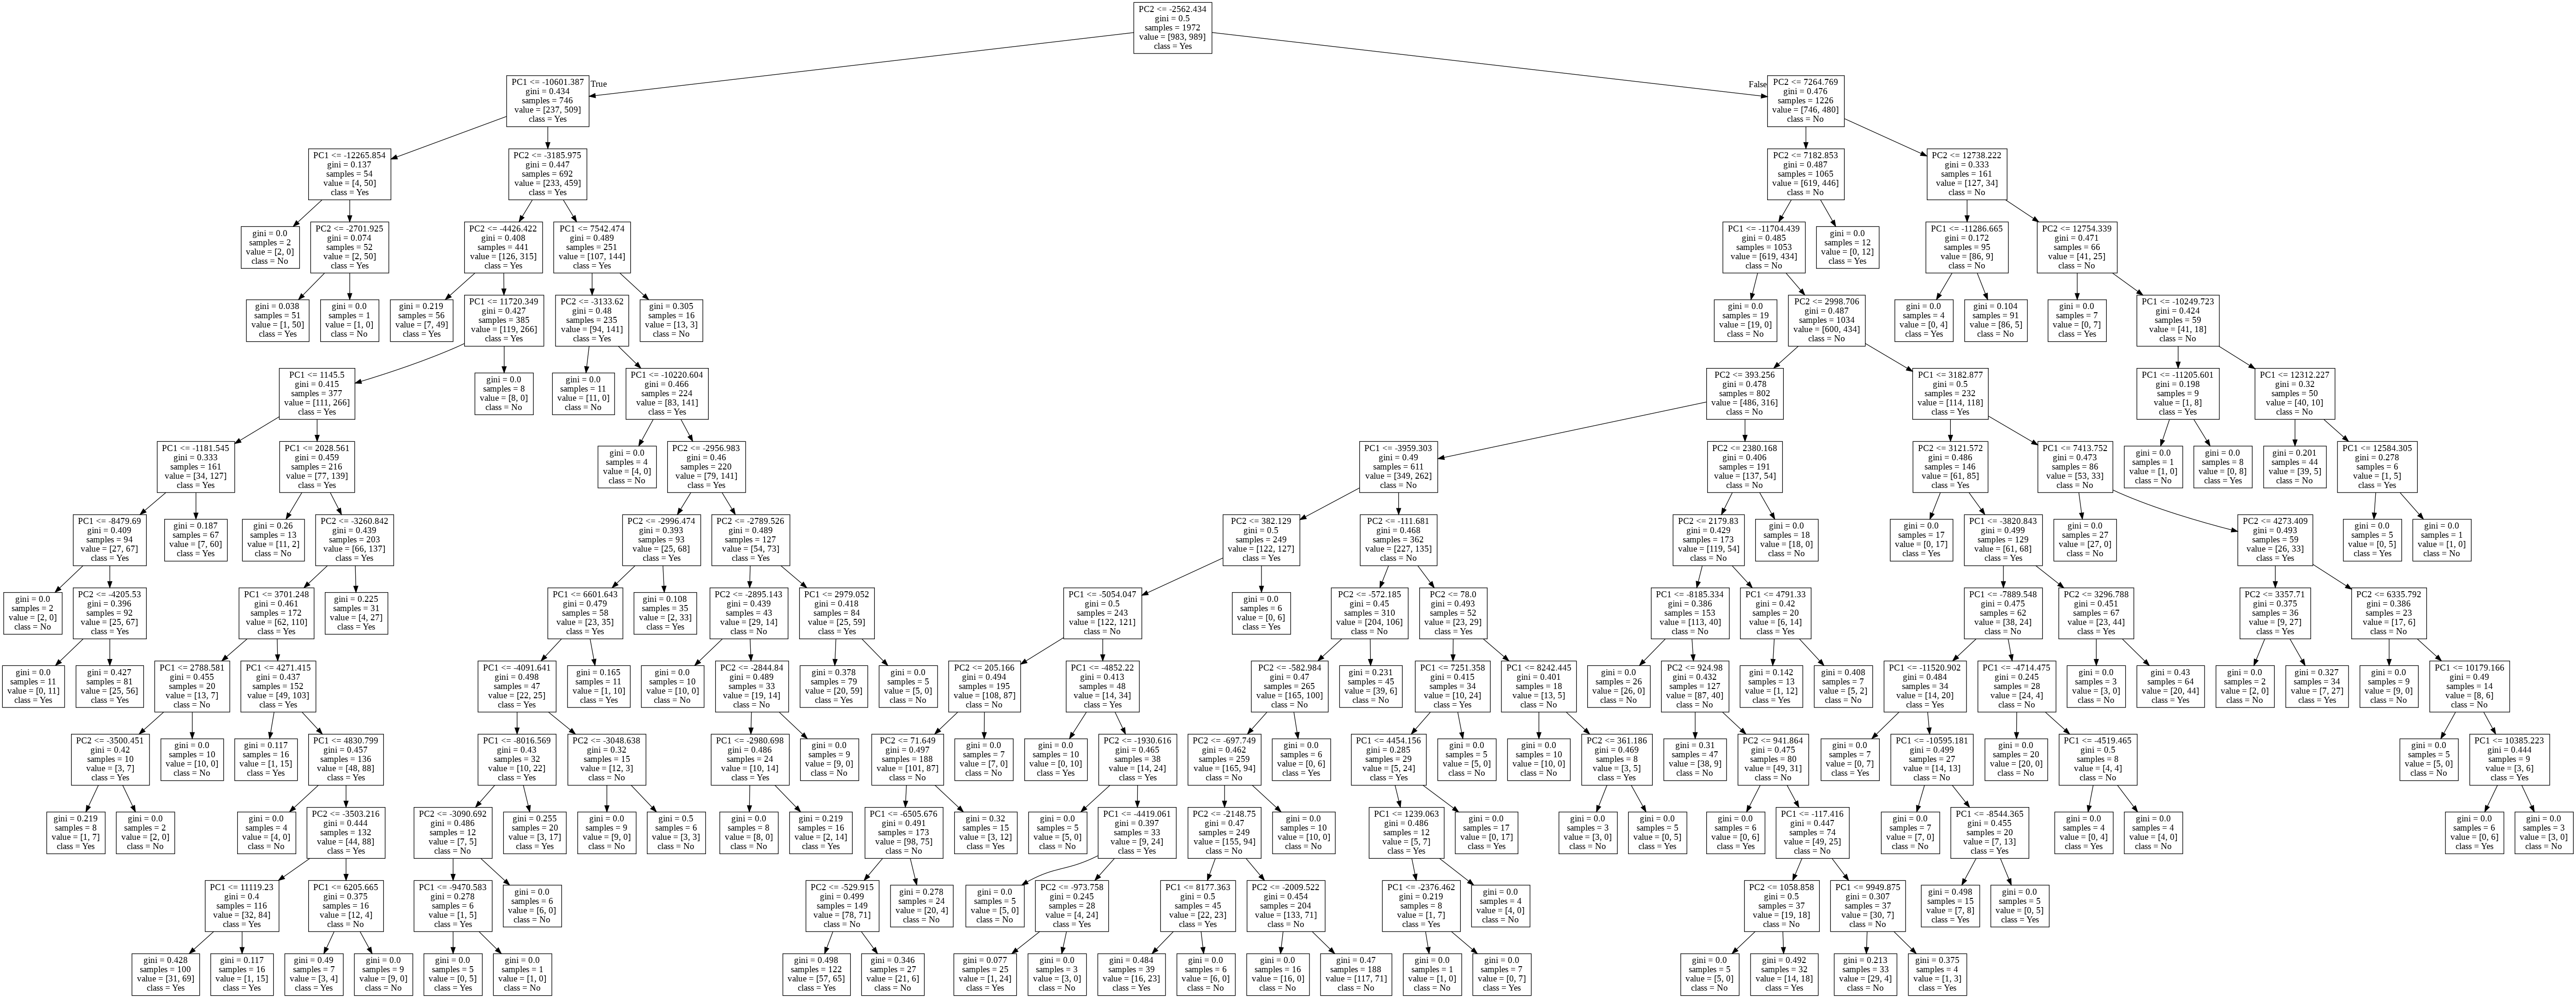

In [52]:
Image('decision_tree_best.png')

## K Fold Cross Validation

In [53]:
def cross_validation(model, X, y, my_cv = 5):
  scores = cross_validate(model, X, y, cv=my_cv, scoring=('accuracy','precision','recall','f1'))
  print(scores)
  print("Accuracy: ", np.mean(scores['test_accuracy']))
  print("Precision: ", np.mean(scores['test_precision']))
  print("Recall: ", np.mean(scores['test_recall']))
  print("F1 Score: ", np.mean(scores['test_f1']))

### Performing K Fold Cross Validation with above Hyperparameters

In [54]:
cross_validation(DecisionTreeClassifier(**best_params_raw), X, Y, 5)

{'fit_time': array([0.00751233, 0.00681806, 0.00700903, 0.00658345, 0.0066433 ]), 'score_time': array([0.00534511, 0.00541544, 0.00536466, 0.00571132, 0.00504565]), 'test_accuracy': array([0.82995951, 0.8296146 , 0.84787018, 0.83772819, 0.86004057]), 'test_precision': array([0.78397213, 0.7985348 , 0.79861111, 0.77302632, 0.82899628]), 'test_recall': array([0.91093117, 0.88259109, 0.93117409, 0.95528455, 0.90650407]), 'test_f1': array([0.84269663, 0.83846154, 0.85981308, 0.85454545, 0.86601942])}
Accuracy:  0.8410426127731562
Precision:  0.7966281266797608
Recall:  0.9172969948322965
F1 Score:  0.8523072247616709
